In [15]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from numpy import unique,argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout,MaxPool2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 55s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

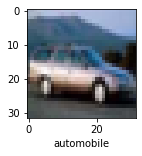

In [13]:
plot_sample(x_train,y_train,4)

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

In [18]:
#ANN
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9433 - accuracy: 0.2800
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7669 - accuracy: 0.3581
Epoch 3/3
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6846 - accuracy: 0.3932


In [22]:
#CNN
model = Sequential()
model.add(Conv2D(filters =32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 35s 21ms/step - loss: 1.4418 - accuracy: 0.4832
Epoch 2/3
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0922 - accuracy: 0.6172
Epoch 3/3
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9570 - accuracy: 0.6689


In [24]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[1.1728253e-02, 2.7721042e-03, 2.6104141e-02, 4.9293748e-01,
        2.3281144e-03, 1.8882897e-01, 1.9360438e-01, 5.9250672e-04,
        7.5793594e-02, 5.3103985e-03],
       [8.0253698e-02, 1.4931031e-01, 8.0723612e-06, 4.0995869e-06,
        1.7845568e-05, 3.1134383e-07, 1.4003527e-07, 2.9723021e-06,
        7.5806904e-01, 1.2333411e-02],
       [1.7467490e-01, 3.9257416e-01, 1.7517931e-03, 3.0170977e-03,
        1.2793373e-03, 4.3019702e-04, 8.8798994e-04, 2.6507399e-03,
        3.5376966e-01, 6.8964019e-02],
       [9.2875779e-01, 3.4868331e-03, 9.5482841e-03, 1.1866536e-04,
        6.1665676e-03, 1.6605609e-05, 7.3668918e-05, 2.5605064e-04,
        5.0844792e-02, 7.3068962e-04],
       [1.9528516e-04, 8.2482904e-04, 6.7872116e-03, 4.3143950e-02,
        2.6598591e-01, 1.6804943e-02, 6.6452640e-01, 1.3401059e-03,
        2.9938229e-04, 9.1976501e-05]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

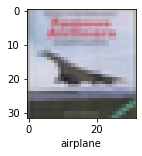

In [29]:
plot_sample(x_test, y_test,3)

In [30]:
classes[y_classes[3]]

'airplane'